In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("/kaggle/input/daily-temperature-of-major-cities/city_temperature.csv")

/tmp/ipykernel_24/1090410815.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/daily-temperature-of-major-cities/city_temperature.csv")


In [3]:
df

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


# Dataframe dimensions

In [4]:
print(f'{df.shape[1]} columns and {df.shape[0]} rows.')

8 columns and 2906327 rows.


# Missing values per column

In [5]:
pd.DataFrame({'Null values': df.isnull().sum(), 'Percentage (%)': round((df.isnull().sum()/df.shape[0]) * 100, 2)}).transpose()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
Null values,0.0,0.0,1450990.00,0.0,0.0,0.0,0.0,0.0
Percentage (%),0.0,0.0,49.93,0.0,0.0,0.0,0.0,0.0


# Dataframe descriptive statistics

In [6]:
pd.options.display.float_format = '{:.2f}'.format # to avoid scientific notation
df.describe()

,Month,Day,Year,AvgTemperature
count,2906327.00,2906327.00,2906327.00,2906327.00
mean,6.47,15.72,2006.62,56.00
std,3.46,8.80,23.38,32.12
min,1.00,0.00,200.00,-99.00
25%,3.00,8.00,2001.00,45.80
50%,6.00,16.00,2007.00,62.50
75%,9.00,23.00,2013.00,75.50
max,12.00,31.00,2020.00,110.00


Here you can see some points to analyze more closely:

The minimum of the column day is ZERO, certainly incorrectly entered data, which configures an inconsistency.

And the minimum of the average temperature column, after all -99 °F corresponds to approximately - 73 °C. Despite being a possible temperature value for very cold areas of the planet, it is important to analyze the data with this value.

In the column year, the smallest value that appears is 200.

# Column renaming

In [7]:
df = df.rename(
    columns= {'Region': 'region', 'Country': 'country', 'State': 'state', 'City': 'city',
              'Month': 'month', 'Day': 'day', 'Year': 'year', 'AvgTemperature': 'avg_temperature'}
)

In [8]:
df['year'].unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020,  201,  200])

# Removal of inconsistent data

In [9]:
day_zero = df.query('day == 0')
day_zero

,region,country,state,city,month,day,year,avg_temperature
82774,Africa,Guinea,NaN,Conakry,3,0,2008,-99.00
85697,Africa,Guinea,NaN,Conakry,3,0,2016,-99.00
92041,Africa,Guinea-Bissau,NaN,Bissau,3,0,2008,-99.00
146077,Africa,Malawi,NaN,Lilongwe,3,0,2012,-99.00
177862,Africa,Nigeria,NaN,Lagos,3,0,2008,-99.00
241159,Africa,Uganda,NaN,Kampala,3,0,2012,-99.00
1209901,North America,Mexico,NaN,Guadalajara,3,0,2012,-99.00
1333910,South/Central America & Carribean,Cuba,NaN,Havana,3,0,2008,-99.00


In [10]:
year_inconsistent = df.query('year < 1995').sample(10)
year_inconsistent

,region,country,state,city,month,day,year,avg_temperature
745325,Europe,Germany,NaN,Hamburg,12,16,201,-99.00
743367,Europe,Germany,NaN,Hamburg,12,3,200,-99.00
755209,Europe,Germany,NaN,Munich,12,6,201,-99.00
232915,Africa,Tanzania,NaN,Dar Es Salaam,12,17,201,-99.00
744173,Europe,Germany,NaN,Hamburg,12,19,201,-99.00
753379,Europe,Germany,NaN,Munich,12,6,201,-99.00
744941,Europe,Germany,NaN,Hamburg,12,27,201,-99.00
755230,Europe,Germany,NaN,Munich,12,27,201,-99.00
845917,Europe,Norway,NaN,Oslo,12,9,200,-99.00
744934,Europe,Germany,NaN,Hamburg,12,20,201,-99.00


In [11]:
df.query('avg_temperature == -99')


,region,country,state,city,month,day,year,avg_temperature
220,Africa,Algeria,NaN,Algiers,8,9,1995,-99.00
221,Africa,Algeria,NaN,Algiers,8,10,1995,-99.00
408,Africa,Algeria,NaN,Algiers,2,13,1996,-99.00
409,Africa,Algeria,NaN,Algiers,2,14,1996,-99.00
1453,Africa,Algeria,NaN,Algiers,12,24,1998,-99.00
...,...,...,...,...,...,...,...,...
2905471,North America,US,Additional Territories,San Juan Puerto Rico,3,29,2011,-99.00
2905534,North America,US,Additional Territories,San Juan Puerto Rico,5,31,2011,-99.00
2905689,North America,US,Additional Territories,San Juan Puerto Rico,11,2,2011,-99.00
2905726,North America,US,Additional Territories,San Juan Puerto Rico,12,9,2011,-99.00


In [12]:
df = df.drop(df.query('avg_temperature == -99').index).reset_index(drop= True) # adjust index after dropping the data
df

,region,country,state,city,month,day,year,avg_temperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.20
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.40
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.80
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.40
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.90
...,...,...,...,...,...,...,...,...
2826650,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.40
2826651,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.60
2826652,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.20
2826653,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.80


# Drop of state column

In [13]:
df = df.drop('state', axis= 1)

Data went from 2906327 rows × 8 columns to 2826655 rows × 7 columns

# Temperature unit conversion

In [14]:
df['avg_temperature'] = df['avg_temperature'].map(lambda x: (x - 32) * (5/9))
df.sample(10)

,region,country,city,month,day,year,avg_temperature
348395,Asia,Japan,Tokyo,4,13,2012,15.33
2593824,North America,US,Corpus Christi,11,28,2006,23.11
1730780,North America,US,Honolulu,12,24,2002,25.44
2524949,North America,US,Knoxville,6,25,1995,24.06
1682961,North America,US,West Palm Beach,6,28,1998,27.39
296709,Asia,India,Calcutta,12,2,2015,26.33
781871,Europe,The Netherlands,Amsterdam,7,11,2005,20.22
909525,Europe,Switzerland,Zurich,11,5,2007,5.22
1824784,North America,US,South Bend,6,4,2007,17.33
1907664,North America,US,Baton Rouge,8,18,2006,28.28


# Derivate columns from date columns

In [15]:
df['date'] = pd.to_datetime(df[['day', 'month', 'year']], format = '%Y-%m-%d')
df['quarter_of_year'] = df['year'].astype(str) + 'Q' + df['date'].dt.quarter.astype(str)
df['century'] = df['year'].map(lambda x: 'XX' if x <= 2000 else 'XXI')
df.sample(5)

,region,country,city,month,day,year,avg_temperature,date,quarter_of_year,century
2764597,North America,US,Charleston,10,25,2018,4.94,2018-10-25,2018Q4,XXI
1994703,North America,US,Grand Rapids,4,20,2001,11.67,2001-04-20,2001Q2,XXI
1756921,North America,US,Chicago,8,4,1998,22.33,1998-08-04,1998Q3,XX
1008442,Middle East,Saudi Arabia,Dhahran,4,20,1998,30.56,1998-04-20,1998Q2,XX
1591720,North America,US,Wilmington,10,2,2007,18.33,2007-10-02,2007Q4,XXI


In [16]:
df = df.drop(['day', 'month'], axis= 1)

# Exploratory analysis

In [17]:
pd.DataFrame({'Mean': df['avg_temperature'].mean(),
              'Median': df['avg_temperature'].median(),
              'Mode': df['avg_temperature'].mode()[0],
              'Standard deviation': df['avg_temperature'].std()},
             index= ['Values'])

,Mean,Median,Mode,Standard deviation
Values,15.76,17.39,26.78,10.61


#  Histogram

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


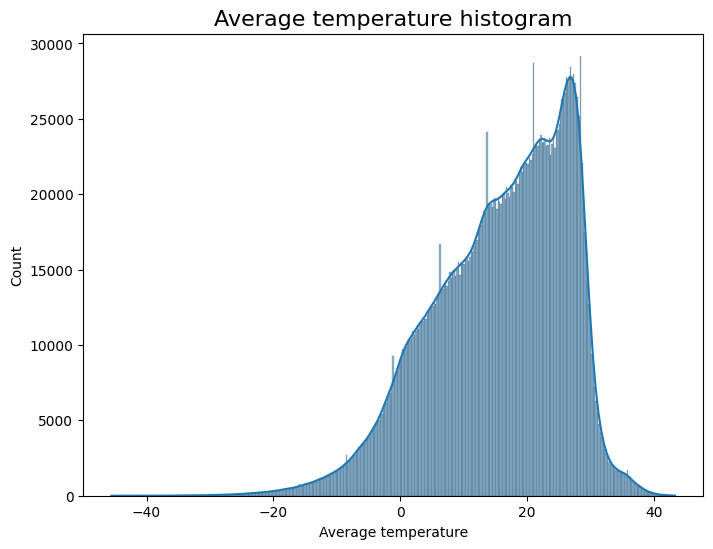

In [18]:
plt.figure(figsize= (8, 6))
ax = sns.histplot(data= df, x= 'avg_temperature', kde= True)
ax.set_title('Average temperature histogram', fontsize= 16)
ax.set_xlabel('Average temperature')
plt.show()

# Mean, median and standard deviation by region

In [19]:
df.groupby('region')['avg_temperature'].agg(['mean', 'median', 'std'])

,mean,median,std
region,,,
Africa,23.56,24.89,5.15
Asia,20.06,24.22,10.96
Australia/South Pacific,16.84,16.72,5.40
Europe,11.08,11.44,8.44
Middle East,23.24,23.67,9.33
North America,13.42,14.72,10.73
South/Central America & Carribean,22.33,23.78,5.99


# Histograms of average temperature by region

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

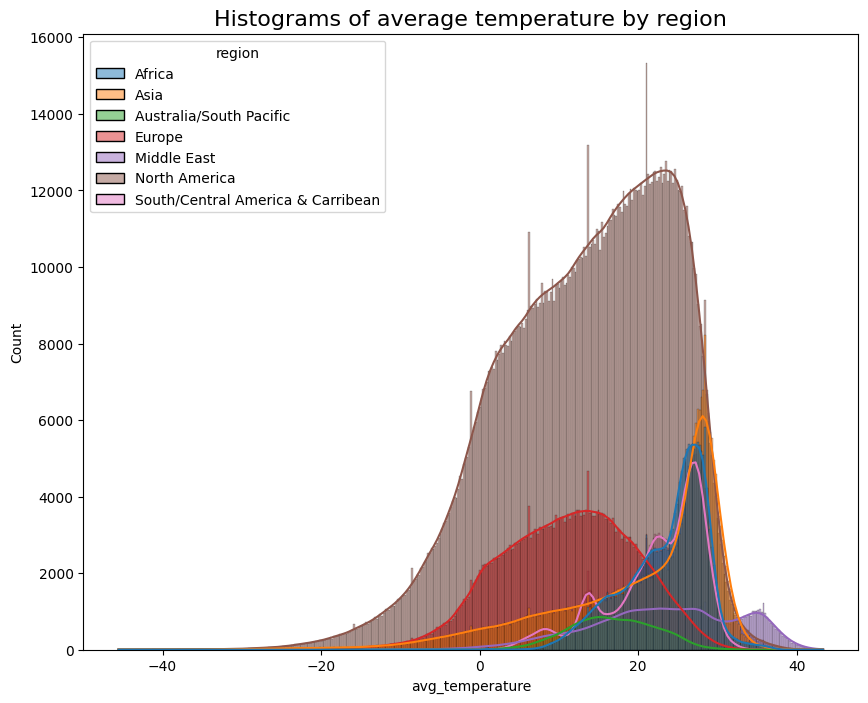

In [20]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'avg_temperature', hue= 'region', kde= True)
ax.set_title('Histograms of average temperature by region', fontsize= 16)
plt.show()

# Data distribution in region column

In [21]:
pd.DataFrame({'Count': df.value_counts('region'),
              'Percentage (%)': round(df.value_counts('region', normalize= True) * 100, 2)})

,Count,Percentage (%)
region,,
North America,1548160,54.77
Europe,368702,13.04
Asia,306163,10.83
Africa,220919,7.82
South/Central America & Carribean,206691,7.31
Middle East,120811,4.27
Australia/South Pacific,55209,1.95


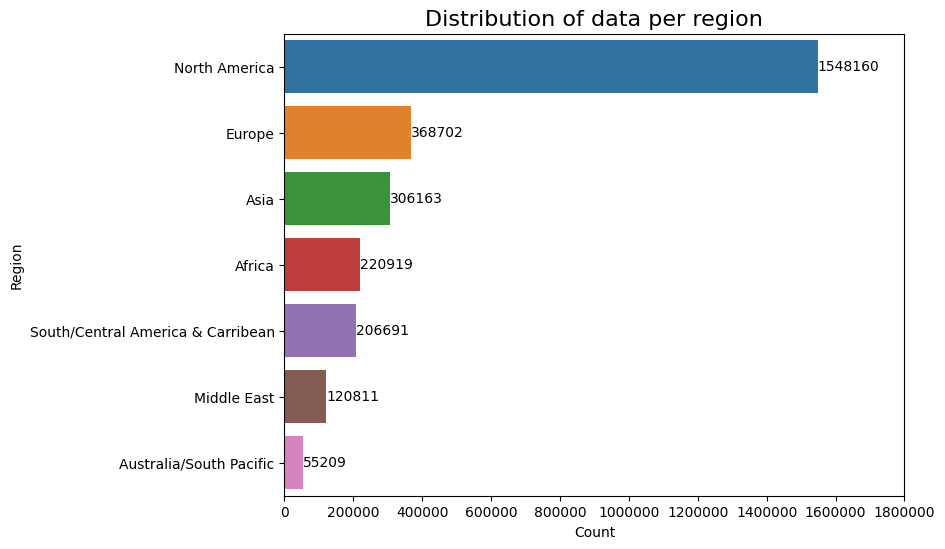

In [22]:
plt.figure(figsize= (8, 6))
plt.ticklabel_format(style='plain', axis= 'x') # avoid scientific notation in xaxis
ax = sns.countplot(data= df, y= 'region', order= df.value_counts('region', ascending= False).index)

for container in ax.containers:
  ax.bar_label(container, fmt= '%d', label_type= 'edge')

plt.title('Distribution of data per region', fontsize= 16)
plt.ylabel('Region')
plt.xlabel('Count')
plt.xlim([0, 1.8e6])
plt.show()

#  Average temperature per year

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

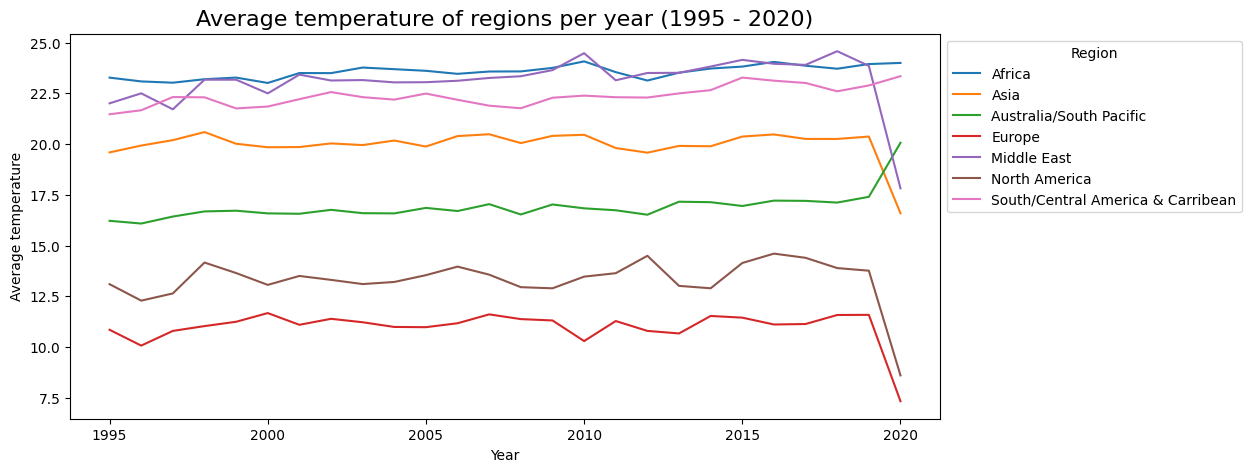

In [23]:
# Assuming df is your DataFrame with the relevant data
region_temperature_per_year = df.groupby(['region', 'year'])['avg_temperature'].mean().reset_index()

# Plot
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(data=region_temperature_per_year, x='year', y='avg_temperature', hue='region', ax=ax)
ax.set_title('Average temperature of regions per year (1995 - 2020)', fontsize=16)
ax.set_ylabel('Average temperature')
ax.set_xlabel('Year')
ax.legend(title='Region', bbox_to_anchor=(1, 1))
plt.subplots_adjust(right=0.85)  # Adjust right to make space for the legend
plt.show()

# linear regression graph

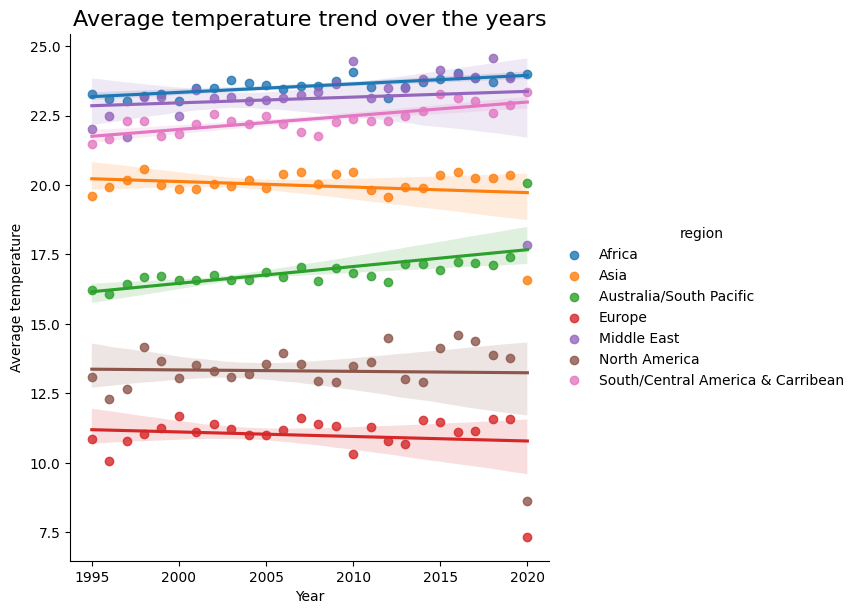

In [24]:
sns.lmplot(data= region_temperature_per_year, x= 'year', y= 'avg_temperature', hue= 'region', height= 6)
plt.title('Average temperature trend over the years', fontsize= 16)
plt.ylabel('Average temperature')
plt.xlabel('Year')
plt.show()

It is possible to notice that the annual temperature averages of the continents are in different levels with

* Africa and the Middle East with higher average temperatures, followed by
* Central/South America and the Caribbean
* Asia and Australia/South Pacific at an intermediate level
* And finally North America and Europe with lower averages.

It is also important to note that the linear regression graph shows an increase in average temperatures over the years for all regions.

# Tempreture per Column country

In [25]:
country_count = df.value_counts('country', ascending= True).tail(25)

In [26]:
top_25_countries = country_count.keys() # names of countries on the top 25 in number of records
df.query('country in @top_25_countries').groupby('country')['avg_temperature'].agg(['mean', 'median', 'std'])

,mean,median,std
country,,,
Australia,17.10,17.06,5.65
Austria,10.82,11.22,8.35
Belgium,10.84,10.89,6.34
Brazil,22.21,22.33,3.33
Canada,5.86,7.06,11.61
China,15.91,18.22,10.89
Denmark,8.56,8.39,6.67
Equador,20.76,23.72,5.91
France,12.99,12.83,6.46


## Histograms of average temperature by country

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

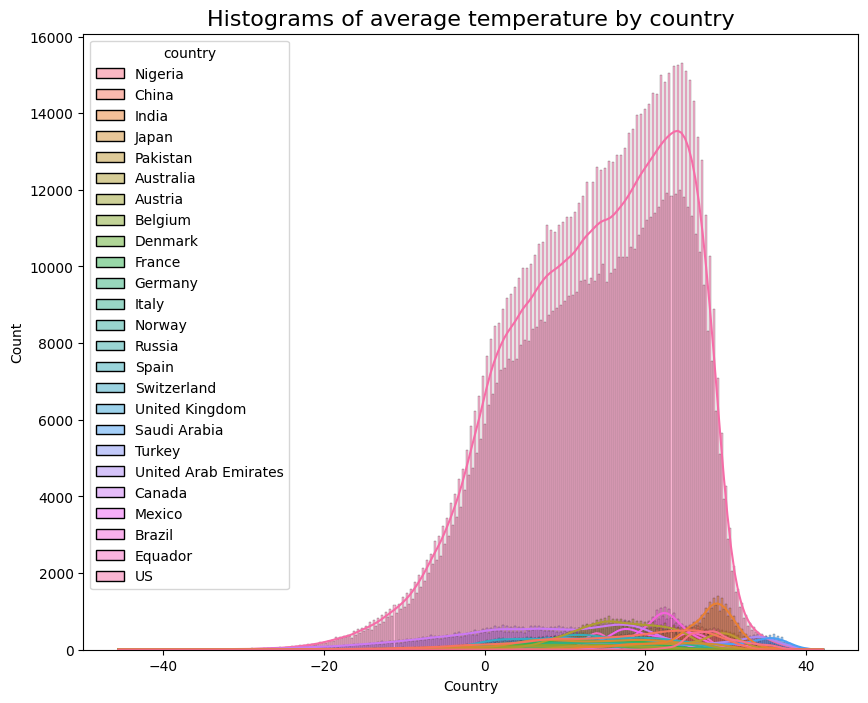

In [27]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df.query('country in @top_25_countries'), x= 'avg_temperature', hue= 'country', kde= True)
ax.set_title('Histograms of average temperature by country', fontsize= 16)
ax.set_xlabel('Country')
plt.show()

## Data distribution in country column

In [28]:
pd.DataFrame({'Count': country_count}).transpose()

country,Belgium,Denmark,Austria,Norway,Russia,Nigeria,Equador,Germany,Pakistan,Saudi Arabia,...,Mexico,Brazil,Switzerland,Japan,Spain,India,Australia,China,Canada,US
Count,9238,9238,9240,9584,12423,15101,15630,17541,18076,18418,...,23640,27496,27681,27710,27712,36903,46002,46139,73965,1450555


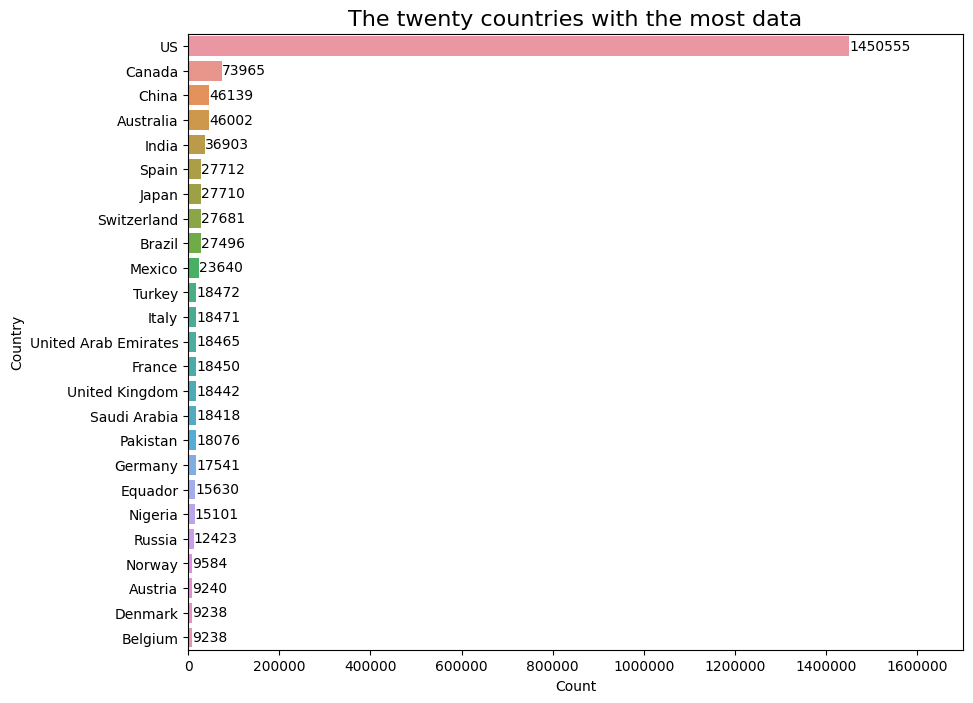

In [29]:
plt.figure(figsize= (10, 8))
plt.ticklabel_format(style='plain', axis='x') # avoid scientific notation in xaxis
ax = sns.countplot(data= df.query('country in @top_25_countries'), y= 'country', 
                   order= df.query('country in @top_25_countries').value_counts('country', ascending= False).index)
ax.set_title('The twenty countries with the most data', fontsize= 16)

for container in ax.containers:
  ax.bar_label(container, fmt= '%d', label_type= 'edge')

plt.xlim([0, 1.7e6])
ax.set_ylabel('Country')
ax.set_xlabel('Count')
plt.show()

# Visualization of the average temperature by country

In [30]:
map_df = df.query('year < 2024').groupby(['country', 'year'])[['avg_temperature']].mean().reset_index()

In [31]:
fig = px.choropleth(
    map_df, locations= 'country', locationmode= 'country names',
    animation_frame= 'year', color= 'avg_temperature',
    hover_name= 'country', color_continuous_scale= 'RdYlBu_r',
    title= 'Average temperature of countries between 1995 - 2019'
)
fig.update_layout(title= {'x': 0.5})
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [32]:
df_small = df[df['country'].isin(['Egypt', 'Algeria'])]
df_small.shape


(18458, 8)

In [33]:
df_small.head()

,region,country,city,year,avg_temperature,date,quarter_of_year,century
0,Africa,Algeria,Algiers,1995,17.89,1995-01-01,1995Q1,XX
1,Africa,Algeria,Algiers,1995,9.67,1995-01-02,1995Q1,XX
2,Africa,Algeria,Algiers,1995,9.33,1995-01-03,1995Q1,XX
3,Africa,Algeria,Algiers,1995,8.00,1995-01-04,1995Q1,XX
4,Africa,Algeria,Algiers,1995,8.83,1995-01-05,1995Q1,XX


# Spliting data to Train, Test and Val

In [34]:
# Extracting the 'AvgTemperature' column as the feature 'X'
X = df_small['avg_temperature'].values.reshape(-1, 1)

# Getting the length of the dataset
dataset_length = len(df_small)

# Calculating the number of data points for each split
train_size = int(0.7 * dataset_length)
val_size = int(0.15 * dataset_length)
test_size = int(0.15 * dataset_length)

# Creating training, validation, and test datasets
training_data = X[:train_size]
val_data = X[train_size:train_size + val_size]
test_data = X[train_size + val_size:]

# Print information about the splits
print(f"Total dataset length: {dataset_length}")
print(f"Training set length: {train_size}")
print(f"Validation set length: {val_size}")
print(f"Test set length: {test_size}")

Total dataset length: 18458
Training set length: 12920
Validation set length: 2768
Test set length: 2768


In [35]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
from sklearn.metrics import  mean_squared_error, mean_absolute_error

2024-08-09 11:00:56.126167: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-09 11:00:56.126358: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 11:00:56.248890: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [36]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)
val_set_scaled = sc.fit_transform(val_data)
test_set_scaled = sc.fit_transform(test_data)

# Test data

In [37]:
input_size=100

# Test data -------------------------------------------------------------
X_train = []
y_train = []
for i in range(input_size, len(training_data)):
    X_train.append(training_set_scaled[i-input_size:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Validation Data

In [38]:
# Validation Data -------------------------------------------------------
X_val = []
y_val = []
for i in range(input_size, len(val_data)):
    X_val.append(val_set_scaled[i-input_size:i, 0])
    y_val.append(val_set_scaled[i, 0])

X_val, y_val = np.array(X_val), np.array(y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))

# Test Data

In [39]:
# Test Data -------------------------------------------------------------
X_test = []
y_test = []
for i in range(input_size, len(test_data)):
    X_test.append(test_set_scaled[i-input_size:i, 0])
    y_test.append(test_set_scaled[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [40]:
model=Sequential()
model.add(LSTM(units = 50, return_sequences= True ,input_shape =(X_train.shape[1],1)))
model.add(Dropout(.2))
model.add(LSTM(units = 50, return_sequences= True))
model.add(Dropout(.2))
model.add(LSTM(units = 50, return_sequences= True))
model.add(Dropout(.2))
model.add(LSTM(units = 50, return_sequences= True))
model.add(Dropout(.2))
model.add(LSTM(units = 50))
model.add(Dropout(.2))
model.add(Dense(units=1))
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,251 (356.45 KB)

 Trainable params: 91,251 (356.45 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
callbacks = [
            EarlyStopping(patience = 50, verbose=1),
            ReduceLROnPlateau(factor = 0.5, patience = 10, min_lr = 0.000001, verbose=1),
    ]

model.compile(optimizer='adam',loss= 'mean_squared_error')

In [42]:
history = model.fit(
    X_train,y_train,
    validation_data=(X_val,y_val),
    epochs=100,
    callbacks=callbacks,
    batch_size=32
)

Epoch 1/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - loss: 0.0224 - val_loss: 0.0107 - learning_rate: 0.0010
Epoch 2/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0077 - val_loss: 0.0097 - learning_rate: 0.0010
Epoch 3/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0063 - val_loss: 0.0092 - learning_rate: 0.0010
Epoch 4/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0061 - val_loss: 0.0093 - learning_rate: 0.0010
Epoch 5/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0058 - val_loss: 0.0091 - learning_rate: 0.0010
Epoch 6/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0053 - val_loss: 0.0084 - learning_rate: 0.0010
Epoch 7/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0048 - val_loss: 0.0073 - learning_rate: 0.0010
Epoch 8/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0045 - val_loss: 0.0060 - learning_rate: 0.0010
Epoch 9/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0037 - val_loss: 0.0048 - learn

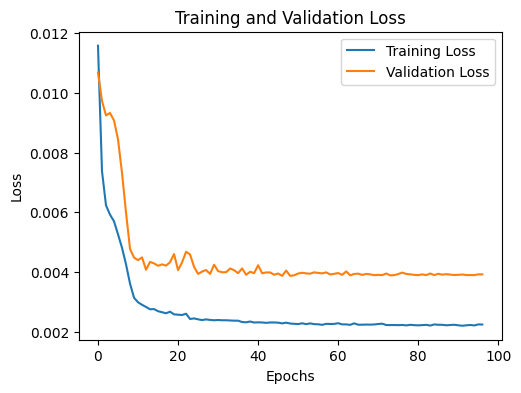

In [43]:
# Access the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 4))
# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [44]:
pred=model.predict(X_test)
test=pd.DataFrame(columns=['test','pred'])
test['test']=y_test
test['pred']=pred.flatten()
print(test)

84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
      test  pred
0     0.26  0.25
1     0.26  0.27
2     0.25  0.26
3     0.23  0.26
4     0.23  0.24
...    ...   ...
2665  0.48  0.61
2666  0.49  0.48
2667  0.53  0.52
2668  0.60  0.55
2669  0.43  0.60

[2670 rows x 2 columns]
